[[1.3259157147378924, 0.0010020793590563507], [0.0010020793590563507, 1.1437902406493046]]


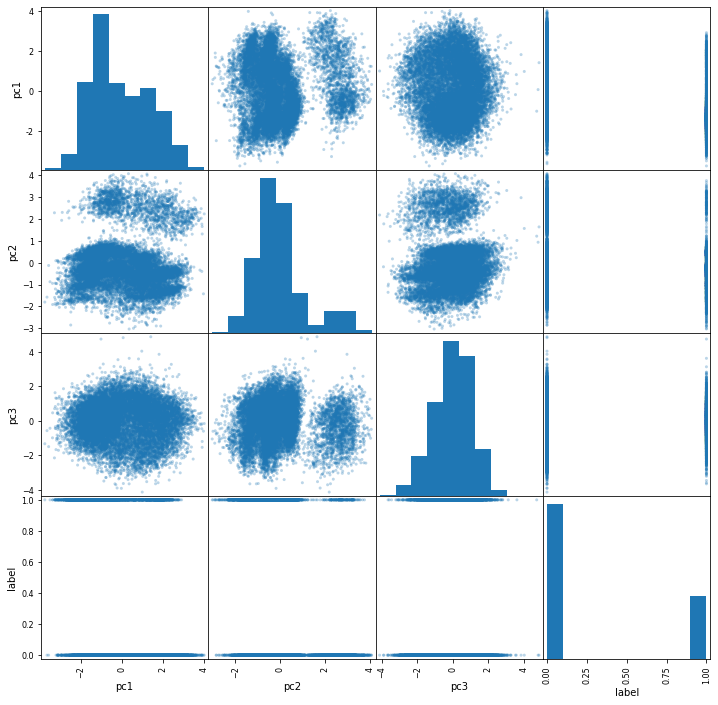

In [0]:
# Using and making GMM 
# Trial on short dataset
# SVM first Time
import numpy as np  
import pandas as pd  
import math
f=open("/content/PCA-3.csv")
data=[]
data2=[]
lobel=[]
temp=0;
for i in f:
    if(temp==0):
        temp=1
        continue
    l=i.split(",")
    l[-1]=float(l[-1][0])
    lobel.append((int(l[-1])))
    l2=l[:-1]
    l=l[1:-1]
    l=[float(j) for j in l];
    data.append(l)
    data2.append(l2);
label=[];
for i in lobel:
    if(i==0):
        label.append(-1)
    else:
        label.append(1)
data2=data2[:10000]
data=data[:10000]
testdata=data[7500:]
data=data[:7500];
data2=data2[:7500]
label=label[:10000]
y_test=label[7500:]
label=label[:7500]
testdata=np.array(testdata)
n=len(data)
m=len(data[0])
f=open("/content/PCA-3.csv")
df=pd.read_csv(f);
pd.plotting.scatter_matrix(df, alpha=0.3, figsize=(12, 12))
df=df.drop(columns=['label'])
df=df.drop(columns=['pc1'])
final=[]
panda=df.cov()
for i in df:
    final.append(panda[i].tolist());
print(final)

In [0]:
def normal_prob(phi,x,u,sigma_inverse,sigma_det):
    x=np.array(x);
    x=np.array(x-u);
    return phi*(0.3989)*math.exp((-1/2)*np.dot(np.dot(x,sigma_inverse),x.T))/sigma_det;
K=3;
mu=[data[i] for i in range(K)];
phi=[1/K]*K;
sigma=[final for j in range(K)];
sigma_inv=[np.linalg.inv(np.array(i)) for i in sigma];
sigma_det=[np.linalg.det(np.array(i)) for i in sigma];


In [0]:
# Now we try to make GMM work
# Step1 --- Construct A matrix (n*K) - which stores Pj(xi) for each point xi for each column i.e K=j
#That was expectation --- Now maximization
# Use the produced formulas to get the results
mat=[[0 for i in range(K)] for j in range(n)];
iteration=10
print(list(sigma[0]))
for it in range(iteration):
    # Expectation
    vertical_sum=[0]*K
    for i in range(n):
        denom=0;
        for j in range(K):
            mat[i][j]=normal_prob(phi[j],data[i],mu[j],sigma_inv[j],sigma_det[j]);
            # mat[i][j]=1
            denom+=mat[i][j]
        for j in range(K):
            mat[i][j]/=denom;
            vertical_sum[j]+=mat[i][j];
    # maximization
    for i in range(K):
        phi[i]= vertical_sum[i]/n;
    for j in range(K):
        temp=[0]*m;
        for i in range(n):
            temp+= mat[i][j]*np.array(data[i]);
        mu[j]=temp/vertical_sum[j];


    # Although I have doubts about covariance -- lets just apply the formula
    # I don't have doubts anymore bitch
    for j in range(K):
        temp=[[0 for i in range(m)] for j in range(m)];
        for i in range(n):
            t=np.array([data[i]- mu[j]]);
            kk= mat[i][j]*(np.dot(t.T,t));
            # print(kk)
            temp=np.add(temp,kk)
        sigma[j]= temp/vertical_sum[j];
    sigma_inv=[np.linalg.inv(np.array(i)) for i in sigma];
    sigma_det=[np.linalg.det(np.array(i)) for i in sigma];
print(sigma)
print(mu)
print(phi)


[[1.3259157147378924, 0.0010020793590563507], [0.0010020793590563507, 1.1437902406493046]]
[array([[0.74461002, 0.13013876],
       [0.13013876, 0.71082728]]), array([[0.24540162, 0.12878444],
       [0.12878444, 1.21635062]]), array([[0.49672604, 0.08448301],
       [0.08448301, 0.95349315]])]
[array([-0.73190587, -1.65347134]), array([ 2.61072232, -0.41992888]), array([-0.36785244,  0.08934676])]
[0.03958151393162857, 0.09562471397626478, 0.8647937720921048]


[[-0.28526451  0.54215593]
 [ 2.61985704 -0.41318297]
 [-0.51985507 -0.7468185 ]]
2500


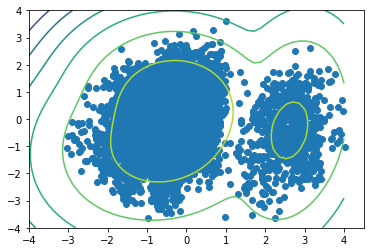

In [0]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=3)
gmm.fit(data)
print(gmm.means_)
# print(gmm.covariances_)
X, Y = np.meshgrid(np.linspace(-4, 4), np.linspace(-4,4))
XX = np.array([X.ravel(), Y.ravel()]).T
print(len(XX))
Z = gmm.score_samples(XX)
Z = Z.reshape((50,50))
plt.contour(X, Y, Z)
plt.scatter(np.array(data)[:, 0], np.array(data)[:,1])

plt.show()

4.024041647011908
3.6115768066819314


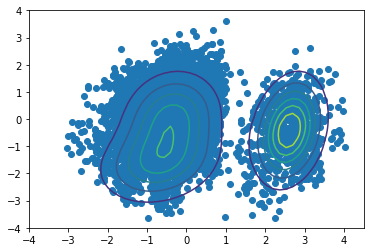

In [0]:
# Making our own new points
# Plot density first
def normal_prob(phi,x,u,sigma_inverse,sigma_det):
    x=np.array(x);
    x=np.array(x-u);
    return (0.3989)*math.exp((-1/2)*np.dot(np.dot(x,sigma_inverse),x.T))/sigma_det; 
def score_samples(xx):
    ans=[]
    for i in xx:
        temp=0;
        for j in range(K):
            # temp=max(normal_prob(phi[j],i,mu[j],sigma_inv[j],sigma_det[j]),temp);
            temp+=(normal_prob(phi[j],i,mu[j],sigma_inv[j],sigma_det[j]));
        ans.append(temp)
    return np.array(ans);
import numpy as np
import matplotlib.pyplot as plt
# from sklearn.mixture import GaussianMixture
# gmm = GaussianMixture(n_components=3)
# gmm.fit(data)
# print(gmm.means_)
# print(gmm.covariances_)
X, Y = np.meshgrid(np.linspace(-4, 4), np.linspace(-4,4))
XX = np.array([X.ravel(), Y.ravel()]).T
# print(len(XX))
Z = score_samples(XX)
Z = Z.reshape((50,50))
plt.contour(X, Y, Z)
plt.scatter(np.array(data)[:, 0], np.array(data)[:,1])
print(max(np.array(data)[:, 0]))
print(max(np.array(data)[:, 1]))
plt.show()

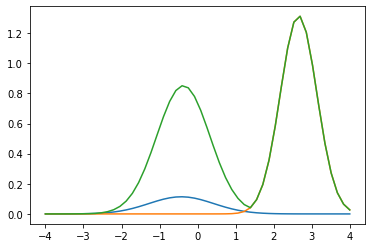

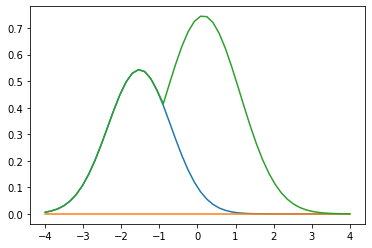

In [0]:
# Density estimates
def score_max(xx):
    ans=[]
    for i in xx:
        temp=0;
        for j in range(K):
            temp=max(normal_prob(phi[j],i,mu[j],sigma_inv[j],sigma_det[j]),temp);
            # temp+=(normal_prob(phi[j],i,mu[j],sigma_inv[j],sigma_det[j]));
        ans.append(temp)
    return np.array(ans);
def score_sampled(xx,j):
    ans=[]
    for i in xx:
        ans.append(normal_prob(phi[j],i,mu[j],sigma_inv[j],sigma_det[j]));
        # ans.append(temp)
    return np.array(ans); 
X, Y =(np.linspace(-4, 4), np.linspace(-4,4))
X1=[[i,0] for i in X];
X2=[[0,i] for i in X];
# Y11=score_max(XX)
Y1=score_max(X1)
Y2=score_max(X2);
Y10=score_sampled(X1,0);
Y11=score_sampled(X1,1);
Y20=score_sampled(X2,0)
Y21=score_sampled(X2,1)
plt.plot(X,Y10)
plt.plot(X,Y11)
plt.plot(X,Y1)
plt.show()
plt.plot(X,Y20)

plt.plot(X,Y21)
plt.plot(X,Y2)

plt.show()


Notes ---
Occam's razor - We increase the number of clusters until we see clear patterns and same cluster formation of data. We do not increase the number of clusters becuase of this principle
Unsupervised Algo.
Contours--- The ellipses show heights of the plot in z axis --- Also, as lighter it gets, more is the value. -- We have plotted the densitites

The plots -- Plotting for both features as x axis, two graphs of densities were plotted. 